# Чем мы занимаемся ?

## 1. Данные 

Мы выбрали данные о поездках на такси в Нью Йорке, анализировать мы будем жёлтые такси, которые ездят по Манхеттену. В нашей работе мы будем анализировать чаевые, мы будем смотреть на то были ли они или нет, и попробуем создать модель, которая будет предсказывать их наличие или отсутствие, также планируем сделатьмодель которая будет предсказывать величину самих чаевых.

In [2]:
import pandas as pd

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt 

import pyarrow.parquet as pq

import io

import math 

In [3]:
path = 'yellow_tripdata_2022-12.parquet'
df_december = pq.read_table(path)
df_december = df_december.to_pandas()
df_december 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-12-01 00:37:35,2022-12-01 00:47:35,1.0,2.00,1.0,N,170,237,1,8.50,3.00,0.5,3.10,0.0,0.3,15.40,2.5,0.00
1,1,2022-12-01 00:34:35,2022-12-01 00:55:21,0.0,8.40,1.0,N,138,141,2,26.00,4.25,0.5,0.00,0.0,0.3,31.05,2.5,1.25
2,1,2022-12-01 00:33:26,2022-12-01 00:37:34,1.0,0.80,1.0,N,140,140,1,5.00,3.00,0.5,1.76,0.0,0.3,10.56,2.5,0.00
3,1,2022-12-01 00:45:51,2022-12-01 00:53:16,1.0,3.00,1.0,N,141,79,3,10.00,3.00,0.5,0.00,0.0,0.3,13.80,2.5,0.00
4,2,2022-12-01 00:49:49,2022-12-01 00:54:13,1.0,0.76,1.0,N,261,231,1,5.00,0.50,0.5,1.76,0.0,0.3,10.56,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399544,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.00,0.5,8.21,0.0,1.0,49.26,NaN,NaN
3399545,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.00,0.5,0.00,0.0,1.0,30.23,NaN,NaN
3399546,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.00,0.5,9.85,0.0,1.0,59.08,NaN,NaN
3399547,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.00,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [ ]:
path_2 = 'yellow_tripdata_2022-06.parquet'
df_june = pq.read_table(path_2)
df_june = df_june.to_pandas()
df_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.00,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.00,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.00,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.00,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.00,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30 23:45:51,2022-06-30 23:51:48,NaN,0.00,NaN,None,148,256,0,9.20,0.50,0.5,0.00,0.00,0.3,15.00,NaN,NaN
3558120,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,NaN,None,79,262,0,18.86,0.00,0.5,5.19,0.00,0.3,27.35,NaN,NaN
3558121,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,NaN,None,164,79,0,10.03,0.00,0.5,3.10,0.00,0.3,16.43,NaN,NaN
3558122,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,NaN,None,211,239,0,24.34,0.00,0.5,0.00,0.00,0.3,27.64,NaN,NaN


In [ ]:
path_3 = 'yellow_tripdata_2022-09.parquet'
df_september = pq.read_table(path_2)
df_september = df_september.to_pandas()
daily_tips3 = df_september.groupby(df_december['tpep_pickup_datetime'].dt.day)['tip_amount'].mean()

In [ ]:
path_4 = 'yellow_tripdata_2023-01.parquet'
df_january = pq.read_table(path_4)
df_january = df_january.to_pandas()
daily_tips4 = df_january.groupby(df_january['tpep_pickup_datetime'].dt.day)['tip_amount'].mean()

In [ ]:
path_5 = 'yellow_tripdata_2022-03.parquet'
df_march = pq.read_table(path_5)
df_march = df_march.to_pandas()
daily_tips5 = df_march.groupby(df_march['tpep_pickup_datetime'].dt.day)['tip_amount'].mean()

In [ ]:
df_december = pq.read_table('yellow_tripdata_2022-12.parquet')
df_december = df_december.to_pandas()

KeyError: ignored

In [ ]:
df_december

In [ ]:
df_june =  pq.read_table('yellow_tripdata_2022-06.parquet')
df_june = df_june.to_pandas()

In [ ]:
df_june

In [ ]:
df_june['PULocationID'].nunique()

261

In [ ]:
url_zones = 'https://raw.githubusercontent.com/IliaRodionov/Taxi_Project/IliaRodionov-small_data_packs/taxi%2B_zone_lookup.csv'
df_zones = pd.read_csv(url_zones)
df_zones.head(70)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
65,66,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
66,67,Brooklyn,Dyker Heights,Boro Zone
67,68,Manhattan,East Chelsea,Yellow Zone
68,69,Bronx,East Concourse/Concourse Village,Boro Zone


In [ ]:
df_zones[df_zones['service_zone'] == 'Yellow Zone']

,LocationID,Borough,Zone,service_zone
3,4,Manhattan,Alphabet City,Yellow Zone
11,12,Manhattan,Battery Park,Yellow Zone
12,13,Manhattan,Battery Park City,Yellow Zone
23,24,Manhattan,Bloomingdale,Yellow Zone
42,43,Manhattan,Central Park,Yellow Zone
44,45,Manhattan,Chinatown,Yellow Zone
47,48,Manhattan,Clinton East,Yellow Zone
49,50,Manhattan,Clinton West,Yellow Zone
67,68,Manhattan,East Chelsea,Yellow Zone
78,79,Manhattan,East Village,Yellow Zone


In [ ]:
(df_zones.Zone).isnull().sum()

1

In [ ]:
(df_zones.service_zone).isnull().sum()

2

In [ ]:
url_weather_june = 'https://raw.githubusercontent.com/IliaRodionov/Taxi_Project/IliaRodionov-small_data_packs/New%20York%20City%2CUSA%202022-06-01%20to%202022-06-30.csv'
df_weather_june = pd.read_csv(url_weather_june)
df_weather_june

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City,USA",2022-06-01T00:00:00,19.9,19.9,15.6,75.86,0.0,0,NaN,0,...,1014.2,29.3,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
1,"New York City,USA",2022-06-01T01:00:00,19.3,19.3,15.5,78.97,0.0,0,NaN,0,...,1014.0,0.9,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
2,"New York City,USA",2022-06-01T02:00:00,18.3,18.3,14.3,77.59,0.0,0,NaN,0,...,1014.6,29.7,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
3,"New York City,USA",2022-06-01T03:00:00,17.2,17.2,13.8,80.53,0.0,0,NaN,0,...,1014.9,89.1,16.0,0,NaN,0,10,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
4,"New York City,USA",2022-06-01T04:00:00,16.7,16.7,13.3,80.48,0.0,0,NaN,0,...,1014.8,99.0,16.0,0,NaN,0,10,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"New York City,USA",2022-06-30T19:00:00,27.8,28.0,15.6,47.20,0.0,0,NaN,0,...,1020.3,0.8,16.0,105,0.4,1,10,Clear,clear-day,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
716,"New York City,USA",2022-06-30T20:00:00,25.7,25.7,17.0,58.53,0.0,0,NaN,0,...,1020.3,0.4,16.0,18,0.1,0,10,Clear,clear-day,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
717,"New York City,USA",2022-06-30T21:00:00,25.0,25.0,18.2,65.88,0.0,0,NaN,0,...,1020.3,0.4,16.0,8,0.0,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,F1417,KNYC,7..."
718,"New York City,USA",2022-06-30T22:00:00,25.0,25.0,18.3,66.30,0.0,0,NaN,0,...,1020.5,0.4,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."


In [ ]:
url_weather_december = 'https://raw.githubusercontent.com/IliaRodionov/Taxi_Project/IliaRodionov-small_data_packs/new%20york%202022-12-01%20to%202022-12-31.csv'
df_weather_december = pd.read_csv(url_weather_december)
df_weather_december

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york,2022-12-01T00:00:00,5.2,0.8,-5.6,45.55,0.000,0,NaN,0.0,...,1012.0,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
1,new york,2022-12-01T01:00:00,4.5,-0.2,-5.8,47.16,0.000,0,NaN,0.0,...,1012.9,97.0,16.0,0,NaN,0,10,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,new york,2022-12-01T02:00:00,3.6,-0.8,-6.6,47.03,0.000,0,NaN,0.0,...,1013.9,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
3,new york,2022-12-01T03:00:00,3.1,-1.0,-7.3,46.27,0.000,0,NaN,0.0,...,1015.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
4,new york,2022-12-01T04:00:00,3.0,-1.3,-8.3,43.33,0.000,0,NaN,0.0,...,1016.1,7.2,16.0,0,NaN,0,10,Clear,clear-night,"72505394728,KLGA,KNYC,72503014732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,new york,2022-12-31T19:00:00,9.3,9.3,8.1,92.38,0.000,0,NaN,0.0,...,1010.8,100.0,1.5,223,0.8,0,10,Overcast,cloudy,"72505394728,KLGA,D2180,72503014732"
740,new york,2022-12-31T20:00:00,9.4,9.4,8.8,95.77,0.671,100,rain,0.0,...,1009.8,100.0,2.5,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
741,new york,2022-12-31T21:00:00,11.6,11.6,10.5,92.71,1.034,100,rain,0.0,...,1008.6,100.0,4.7,225,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"
742,new york,2022-12-31T22:00:00,11.2,11.2,10.7,96.73,2.856,100,rain,0.0,...,1008.6,100.0,3.7,227,0.8,0,10,"Rain, Overcast",rain,"72505394728,KLGA,D2180,KNYC,72503014732"


## 2. Features

Итак говоря о признаках, важно определить какие нам будут нужны в будущем а какие нет, но для начала пройдёмся по всем. 

- VendorID - Указывает провайдера (две компании 1=  Creative Mobile Technologies, LLC 2= VeriFone Inc)

- tpep_pickup_datetime - Дата и время начала поездки 

- tpep_dropoff_datetime - Дата и время окончания поездки 

- Passenger_count - Количество пассажиров указываемое водителем 

- Trip_distance - Дистанция поездки измеренная таксометром

- PULocationID - Место начала поездки 

- DOLocationID -  Пункт назначения 

- RateCodeID - Код ставки применяемой к поездке (1= Standard rate, 2= JFK (аэропорт кеннеди), 3= Newark, 4= Nassau or Westchester, 5= Negotiated fare, 6= Group ride)

- Store_and_fwd_flag - 

- Payment_type - Тип опалаты (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided Trip)

- Fare_amount - Стоимость поездки рассчитанная по времени и расстоянию

- Extra - Сборы за доп услуги 0.5 долларов В час пик и 1 доллар в ночь 

- MTA_tax - Налог MTA в размере 0,50 доллара США, который автоматически взимается в зависимости от используемой учетной ставки

- Improvement_surcharge - За поездки при сбросе флага взимается дополнительная плата за улучшение в размере 0,30 доллара США. Надбавка за благоустройство начала взиматься в 2015 году.

- Tip_amount - Чаевые 

- Tolls_amount - пошлины 

- Total_amount - сколько всего заплатил пассажир, не включает наличные чаевые 

- Congestion_Surcharge - Общая сумма, взимаемая в поездке за дополнительную плату за пробки в Нью-Йорке.

- Airport_fee - 1,25 доллара за приезд такси только в аэропортах Ла Гуардиа и Джона Ф. Кеннеди

# 3. Предобработка данных

Заполнение пропусков

In [ ]:
df_june.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
             'congestion_surcharge', 'airport_fee'], axis=1, inplace=True)

In [ ]:
df_september.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
             'congestion_surcharge', 'airport_fee'], axis=1, inplace=True)

df_december.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
             'congestion_surcharge', 'airport_fee'], axis=1, inplace=True)

df_january.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
             'congestion_surcharge', 'airport_fee'], axis=1, inplace=True)

df_march.drop(['RatecodeID', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
             'congestion_surcharge', 'airport_fee'], axis=1, inplace=True)

In [ ]:
df_june

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount
0,1,2022-06-01,2022-06-01,1.0,11.00,70,48,2.00
1,1,2022-06-01,2022-06-01,1.0,4.20,170,226,0.00
2,2,2022-06-01,2022-06-01,1.0,9.49,264,113,5.00
3,1,2022-06-01,2022-06-01,2.0,12.10,132,17,0.00
4,1,2022-06-01,2022-06-01,0.0,1.80,140,163,2.55
...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30,2022-06-30,NaN,0.00,148,256,0.00
3558120,2,2022-06-30,2022-06-30,NaN,5.01,79,262,5.19
3558121,2,2022-06-30,2022-06-30,NaN,1.55,164,79,3.10
3558122,2,2022-06-30,2022-06-30,NaN,5.30,211,239,0.00


In [ ]:
df_june.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          132448
trip_distance                 0
PULocationID                  0
DOLocationID                  0
tip_amount                    0
dtype: int64

In [ ]:
df_june['passenger_count'].unique()

array([ 1.,  2.,  0.,  4.,  3.,  5.,  6.,  7.,  8.,  9., nan])

Заполним пропуски в столбце passenger_count модой. Так как наиболее часто встречаемое значение числа пассажиров в такси единица.

In [ ]:
moda = df_june['passenger_count'].mode()[0]
df_june['passenger_count'].fillna(moda, inplace=True)
df_september['passenger_count'].fillna(moda, inplace=True)
df_december['passenger_count'].fillna(moda, inplace=True)
df_january['passenger_count'].fillna(moda, inplace=True)
df_march['passenger_count'].fillna(moda, inplace=True)

In [ ]:
df_september

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,70,48,2.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,170,226,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,264,113,5.00
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,132,17,0.00
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,140,163,2.55
...,...,...,...,...,...,...,...,...
3558119,1,2022-06-30 23:45:51,2022-06-30 23:51:48,1.0,0.00,148,256,0.00
3558120,2,2022-06-30 23:25:00,2022-06-30 23:40:00,1.0,5.01,79,262,5.19
3558121,2,2022-06-30 23:29:00,2022-06-30 23:37:00,1.0,1.55,164,79,3.10
3558122,2,2022-06-30 23:24:15,2022-06-30 23:50:19,1.0,5.30,211,239,0.00


Расшифруем значения столбца VendorID согласно документации такси Нью-Йорка

In [ ]:
df_june['VendorID'] = df_june['VendorID'].replace({1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'})
df_december['VendorID'] = df_december['VendorID'].replace({1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'})
df_september['VendorID'] = df_september['VendorID'].replace({1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'})
df_january['VendorID'] = df_january['VendorID'].replace({1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'})
df_march['VendorID'] = df_march['VendorID'].replace({1: 'Creative Mobile Technologies', 2: 'VeriFone Inc'})

# 4. Гипотезы

В рамках проекта мы планируем рассмотреть несколько гипотез.
Давайте рассмотрим одну из гипотез, которую мы хотим проверить.

- Как правило, в декабре выплачиваются годовые бонусы, поэтому у населения больше денег. Поэтому мы предполагаем что в декабре чаевые таксистам выше, чем в другие месяцы.

В дальнейшем мы планируем проанализировать и другие гипотезы. На данный момент полностью они ещё не сформулированы. Один из возможных вариантов: В дождливые дни чаевые таксистам платят чаще; в дождливые дни чаевые таксистам платят в большем размере; длительность поездки влияет на чаевые положительно и т.п

In [ ]:
df_june['tpep_pickup_datetime'] = pd.to_datetime(df_june['tpep_pickup_datetime'])
df_december['tpep_pickup_datetime'] = pd.to_datetime(df_december['tpep_pickup_datetime'])


df_june['tpep_pickup_datetime'] = df_june['tpep_pickup_datetime'].dt.date
df_december['tpep_pickup_datetime'] = df_december['tpep_pickup_datetime'].dt.date
df_june['tpep_dropoff_datetime'] = df_june['tpep_dropoff_datetime'].dt.date
df_december['tpep_dropoff_datetime'] = df_december['tpep_dropoff_datetime'].dt.date

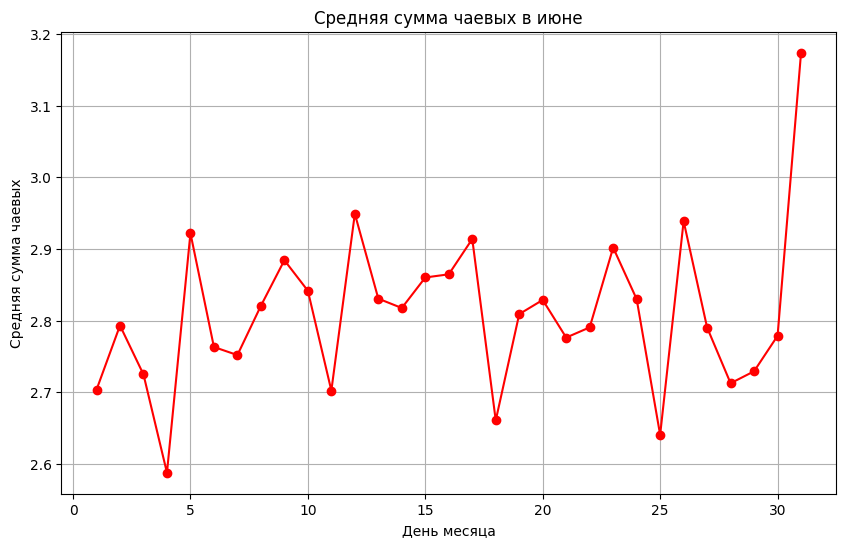

In [ ]:
# Преобразование столбца времени в тип datetime
df_june['tpep_pickup_datetime'] = pd.to_datetime(df_june['tpep_pickup_datetime'])

# Группировка данных по дню и вычисление среднего значения tip_amount
daily_tips = df_june.groupby(df_june['tpep_pickup_datetime'].dt.day)['tip_amount'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(daily_tips.index, daily_tips.values, marker='o', linestyle='-', color='red')
plt.xlabel('День месяца')
plt.ylabel('Средняя сумма чаевых')
plt.title('Средняя сумма чаевых в июне')
plt.grid(True)
plt.show()

При построении графика для декабря мы столкнулись с некоторой странностью. Из-за аномально высокого значения чаевых в конкретной поездке график получался неадекватный. Возможно это была ошибка в сборе данных департаментом транспорта, потому что вряд ли кто-то дал чаевые в размере 133 миллионов долларов.
Заменив это аномальное значение на среднюю сумму чаевых за декабрь мы снова столкнулись с аномальным значением в 40 тысяч долларов. Поэтому решили задать уровень после которого такие выбросы будут заменяться на среднее значение за весь месяц(таким ограничителем мы взяли максимальную сумму чаевых за июнь, так как там таких выбросов не было)

In [ ]:
# Определите уровень, выше которого нужно заменить значения
threshold = 1400.16

# Вычислите среднее значение чаевых за всё время
mean_tip_amount = df_december['tip_amount'].mean()

# Замените значения выше уровня на среднее значение
df_december.loc[df_december['tip_amount'] > threshold, 'tip_amount'] = mean_tip_amount

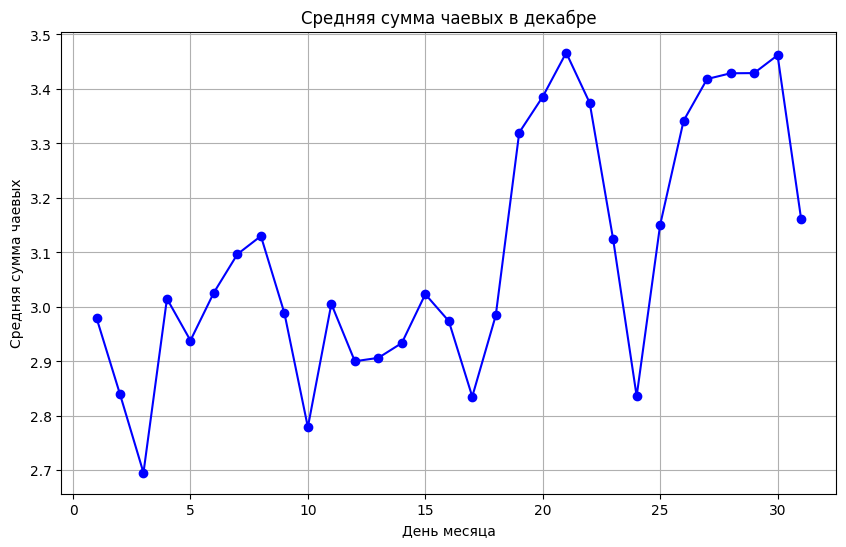

In [ ]:
# Преобразование столбца времени в тип datetime для нового DataFrame
df_december['tpep_pickup_datetime'] = pd.to_datetime(df_december['tpep_pickup_datetime'])

# Группировка данных по дню и вычисление среднего значения tip_amount для нового DataFrame
daily_tips2 = df_december.groupby(df_december['tpep_pickup_datetime'].dt.day)['tip_amount'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(daily_tips2.index, daily_tips2.values, marker='o', linestyle='-', color='blue')
plt.xlabel('День месяца')
plt.ylabel('Средняя сумма чаевых')
plt.title('Средняя сумма чаевых в декабре')
plt.grid(True)
plt.show()

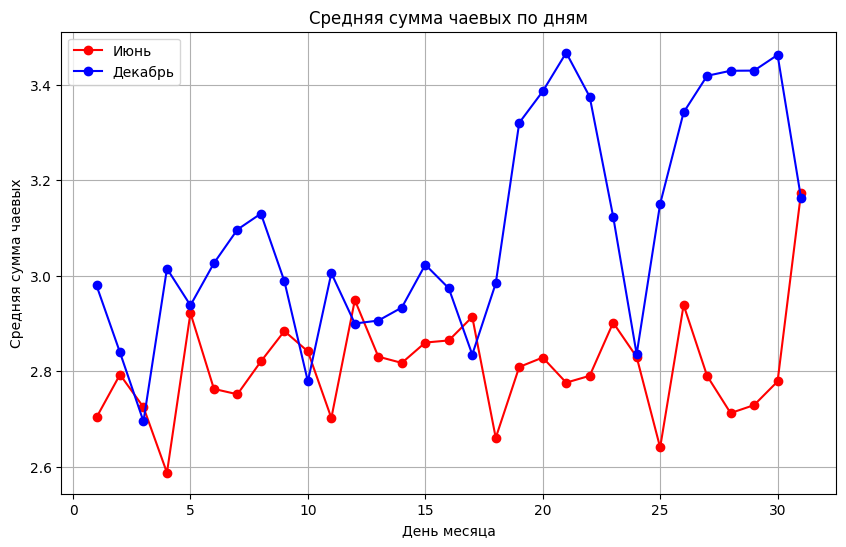

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_tips.index, daily_tips.values, marker='o', linestyle='-', color='red', label='Июнь')
plt.plot(daily_tips2.index, daily_tips2.values, marker='o', linestyle='-', color='blue', label='Декабрь')
plt.xlabel('День месяца')
plt.ylabel('Средняя сумма чаевых')
plt.title('Средняя сумма чаевых по дням')
plt.legend()
plt.grid(True)
plt.show()

На линейном графике мы видим, что действительно, среднее значение чаевых таксистам в декябре больше, чем в сентябре. На данном этапе наша гипотеза не отвергается.

В то же время к нам пришла мысль, насколько корректно делать вывод о том, что в декабре на чаевые таксистам тратят больше, сравнивая только с июнем. Возможно это какая-то особенность характерная июню, например, что обеспеченные люди уезжают из города на летний отдых. Поэтому мы решили взять ещё несколько месяцев в разные сезона года и проверить этот факт.

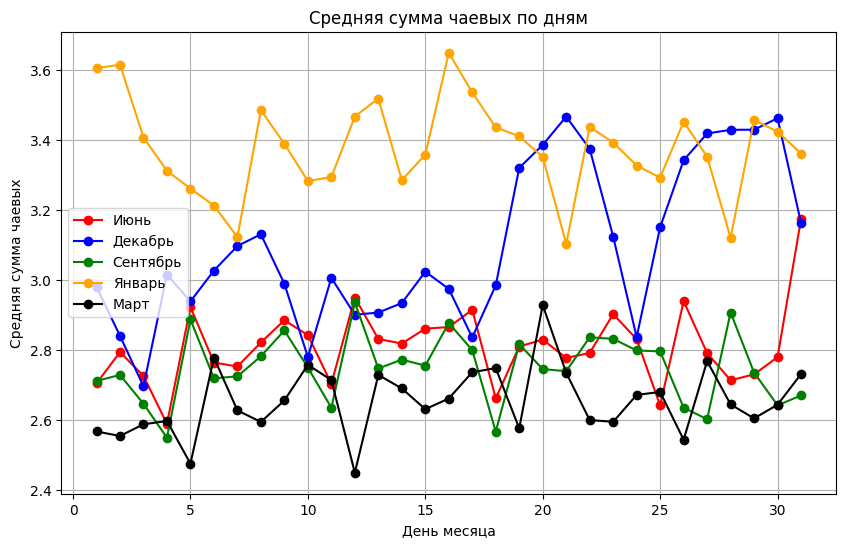

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_tips.index, daily_tips.values, marker='o', linestyle='-', color='red', label='Июнь')
plt.plot(daily_tips2.index, daily_tips2.values, marker='o', linestyle='-', color='blue', label='Декабрь')
plt.plot(daily_tips3.index, daily_tips3.values, marker='o', linestyle='-', color='green', label='Сентябрь')
plt.plot(daily_tips4.index, daily_tips4.values, marker='o', linestyle='-', color='orange', label='Январь')
plt.plot(daily_tips5.index, daily_tips5.values, marker='o', linestyle='-', color='black', label='Март')
plt.xlabel('День месяца')
plt.ylabel('Средняя сумма чаевых')
plt.title('Средняя сумма чаевых по дням')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим на график. Мы видим, что средняя сумма чаевых, начиная с 20-ых чисел декабря выше чем в начале декабре и примерно равна(даже чуть ниже) чем в первой половине января. Годовой бонус выплачивается, как правило, к концу декабря в РФ. Но в США это может быть раньше, так как в 20-ых числах декабря празднуется католическое рождество. Средняя сумма чаевых в сентябре, марте и июне значительно ниже чем в декабре и январе. Таким образом, мы делаем вывод что наша гипотеза верна. И люди, получившие годовой бонус в декабре, начинают давать больше чаевых. В том числе и на протяжении Января, ведь к этому моменту полученные деньги остаются в запасе.

# 5. Машинное обучение 


В нашем проеке мы будем предсказывать были ли чаевые по окончанию поездки, для этого мы будем использовать модель-классификатор. Также мы будем предсказывать размер чаевых решая задачу регрессии. 

Говоря о подготовке данных к ML мы будем брать только одну неделю из каждого из двух месяцев (декабрь и июнь), потому что данных у нас очень много (примерно по 3.5кк в каждом месяце), и модель будет обучаться очень долго.

Перейдём к фичам. Мы будем использовать время поездки (то есть во сколько поездка была начата) и также сколько она продлилась. Ещё мы будем анализировать место где началась поездка. Также мы хотим добавить был ли день выходным или нет (добавим столбец где будет закодированы выходные и будние дни как 0 и 1, 0 - будний, 1 - выходной). Также мы нашли погоду в Нью-Йорке, по выбранным месяцам за каждый час. Помимо температуры мы думаем закодировать был ли дождь или нет (0 - дождя не было, 1 - дождь был). Также мы думаем убрать некоторые фичи, однако на данный момент мы их пока точно не выделили, но далее мы проработаем данный вопрос. 

Говоря о моделях, которые мы будем использовать. Мы скорее всего будем использовать классификатор случайного леса. Так как данных у нас много, а модель случайный лес довольно устойчива к переобучению, и нам кажется что она подойдёт для предсказания наличия чаевых неплохо.

Говоря о предсказании размера чаевых, мы пока ещё не определились с моделью, на данный момент мы изучаем разные регрессоры, такие как Ridge, Lasso, Линейная модель, регрессор случайный лес, однако далее в нашей работе мы укажем то, почему мы выбрали определённую модель и опишем её преимущества. 


# Что дальше?

Помимо шагов на будущее описанных выше. Мы также проведём более подробный EDA. Рассмотрим больше гипотез, попробуем выявить некоторые зависимости в наших данных и , в целом, проанализируем наши данные с качественной визуализацией.